# Importing library

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("insurance_claims.csv")

In [3]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


# Performing EDA 

In [5]:
## SIZE OF DATA
### Shape of data is (1000,40)
data.shape

(1000, 40)

In [7]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

# Checking Nulls Values

In [ ]:
data.isnull().sum()

In [14]:
# droping null values in _c39 Because it all null values
data.drop('_c39',axis=1,inplace=True)

# Plotting heatmap for checking correlation

<AxesSubplot:>

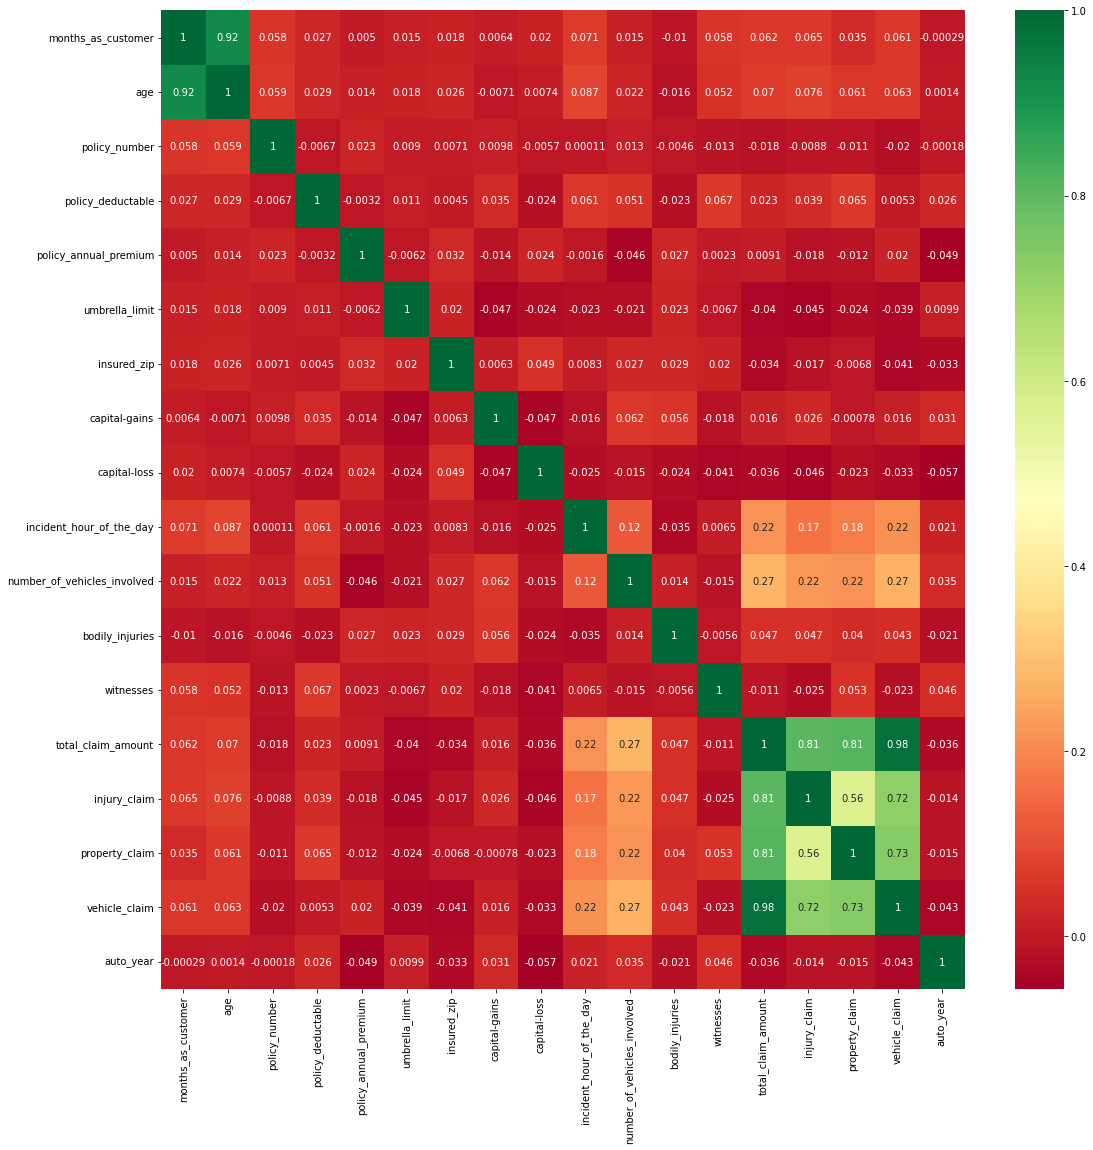

In [159]:
plt.figure(figsize=(18,18))
sns.heatmap(data.corr(),annot=True,cmap="RdYlGn")

In [15]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

# For Better EDA using Pandas profilling library

In [160]:
import pandas_profiling as pp
profile = pp.ProfileReport(data)
profile.to_file("output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [20]:
# POLICY STATE
data.policy_state.unique()

array(['OH', 'IN', 'IL'], dtype=object)

In [22]:
data.policy_csl.unique()


array(['250/500', '100/300', '500/1000'], dtype=object)

In [24]:
data['policy_state'].value_counts()

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

In [25]:
data['policy_csl'].value_counts()

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64

# Here i am using OneHotEncoder for handling categorical features 

In [26]:
# converting a policiy state and csl 
from sklearn.preprocessing import OneHotEncoder


In [27]:
data1 = pd.get_dummies(data, columns = ['policy_state', 'policy_csl'])

In [28]:
data1.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,auto_make,auto_model,auto_year,fraud_reported,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000
0,328,48,521585,2014-10-17,1000,1406.91,0,466132,MALE,MD,...,Saab,92x,2004,Y,0,0,1,0,1,0
1,228,42,342868,2006-06-27,2000,1197.22,5000000,468176,MALE,MD,...,Mercedes,E400,2007,Y,0,1,0,0,1,0
2,134,29,687698,2000-09-06,2000,1413.14,5000000,430632,FEMALE,PhD,...,Dodge,RAM,2007,N,0,0,1,1,0,0
3,256,41,227811,1990-05-25,2000,1415.74,6000000,608117,FEMALE,PhD,...,Chevrolet,Tahoe,2014,Y,1,0,0,0,1,0
4,228,44,367455,2014-06-06,1000,1583.91,6000000,610706,MALE,Associate,...,Accura,RSX,2009,N,1,0,0,0,0,1


In [29]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   int64  
 7   insured_zip                  1000 non-null   int64  
 8   insured_sex                  1000 non-null   object 
 9   insured_education_level      1000 non-null   object 
 10  insured_occupation           1000 non-null   object 
 11  insured_hobbies              1000 non-null   object 
 12  insured_relationship         1000 non-null   object 
 13  capital-gains      

In [35]:
data.insured_sex.unique()

array(['MALE', 'FEMALE'], dtype=object)

In [36]:
# insured_sex column male=1,female=0
data1['insured_sex'].replace({'MALE':1, 'FEMALE':0}, inplace=True)


In [40]:
data1.fraud_reported.unique()

array([1, 0], dtype=int64)

In [39]:
# fraud_reported column Y=1,N=0
data1['fraud_reported'].replace({'Y':1, 'N':0}, inplace=True)

In [41]:
data1.auto_model.unique()

array(['92x', 'E400', 'RAM', 'Tahoe', 'RSX', '95', 'Pathfinder', 'A5',
       'Camry', 'F150', 'A3', 'Highlander', 'Neon', 'MDX', 'Maxima',
       'Legacy', 'TL', 'Impreza', 'Forrestor', 'Escape', 'Corolla',
       '3 Series', 'C300', 'Wrangler', 'M5', 'X5', 'Civic', 'Passat',
       'Silverado', 'CRV', '93', 'Accord', 'X6', 'Malibu', 'Fusion',
       'Jetta', 'ML350', 'Ultima', 'Grand Cherokee'], dtype=object)

In [45]:
# As per my analysis this auto_model column has no any effect on fraud detcetion so i am droping this column
data1.drop('auto_model',axis=1,inplace=True)

In [46]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   int64  
 7   insured_zip                  1000 non-null   int64  
 8   insured_sex                  1000 non-null   int64  
 9   insured_education_level      1000 non-null   object 
 10  insured_occupation           1000 non-null   object 
 11  insured_hobbies              1000 non-null   object 
 12  insured_relationship         1000 non-null   object 
 13  capital-gains      

In [47]:
 data1.auto_make.unique()
    
    
    ## auto make column consist a car company name which makes no sense on insurance fraud so i am droping it 

array(['Saab', 'Mercedes', 'Dodge', 'Chevrolet', 'Accura', 'Nissan',
       'Audi', 'Toyota', 'Ford', 'Suburu', 'BMW', 'Jeep', 'Honda',
       'Volkswagen'], dtype=object)

In [54]:
 data1.police_report_available.unique()

array(['YES', '?', 'NO'], dtype=object)

In [55]:
 data1['police_report_available'].value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [56]:
data1['police_report_available'].replace({'NO':1, 'YES':0,'?':2}, inplace=True)

In [58]:
 data1['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [59]:
data1['property_damage'].replace({'NO':1, 'YES':0,'?':2}, inplace=True)

In [60]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   int64  
 7   insured_zip                  1000 non-null   int64  
 8   insured_sex                  1000 non-null   int64  
 9   insured_education_level      1000 non-null   object 
 10  insured_occupation           1000 non-null   object 
 11  insured_hobbies              1000 non-null   object 
 12  insured_relationship         1000 non-null   object 
 13  capital-gains      

In [61]:
data1.drop('auto_make',axis=1,inplace=True)

In [62]:
 data1['incident_type'].value_counts()

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

In [63]:
 data1['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [69]:
  # in this column we can used ranking based 
    #data1['incident_severity'].value_counts()
data1['incident_severity'].replace({'Minor Damage':0, 'Trivial Damage':1,'Major Damage':2,'Total Loss':3},inplace=True)

In [70]:
  data1['authorities_contacted'].value_counts()

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64

In [73]:
 data1['incident_state'].value_counts() 

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

In [74]:
  data1['incident_city'].value_counts() 

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64

In [75]:
 data1['incident_location'].value_counts() 

9935 4th Drive         1
4214 MLK Ridge         1
8548 Cherokee Ridge    1
2352 MLK Drive         1
9734 2nd Ridge         1
                      ..
6770 1st St            1
4119 Texas St          1
4347 2nd Ridge         1
1091 1st Drive         1
1416 Cherokee Ridge    1
Name: incident_location, Length: 1000, dtype: int64

In [79]:
## For evaluted column i am using one hot encoding
data1 = pd.get_dummies(data1, columns = ['incident_city','incident_state','authorities_contacted'])

In [80]:
data1 = pd.get_dummies(data, columns = ['incident_type'])

In [81]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 41 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   months_as_customer                      1000 non-null   int64  
 1   age                                     1000 non-null   int64  
 2   policy_number                           1000 non-null   int64  
 3   policy_bind_date                        1000 non-null   object 
 4   policy_state                            1000 non-null   object 
 5   policy_csl                              1000 non-null   object 
 6   policy_deductable                       1000 non-null   int64  
 7   policy_annual_premium                   1000 non-null   float64
 8   umbrella_limit                          1000 non-null   int64  
 9   insured_zip                             1000 non-null   int64  
 10  insured_sex                             1000 non-null   objec

In [82]:
## Nowing we are doing this on new data for clear confusion
d=pd.read_csv("insurance_claims.csv")

In [83]:
d.drop('_c39',axis=1,inplace=True)
d= pd.get_dummies(d, columns = ['policy_state', 'policy_csl'])
d['insured_sex'].replace({'MALE':1, 'FEMALE':0}, inplace=True)
d['fraud_reported'].replace({'Y':1, 'N':0}, inplace=True)
d.drop('auto_model',axis=1,inplace=True)
d['police_report_available'].replace({'NO':1, 'YES':0,'?':2}, inplace=True)
d['property_damage'].replace({'NO':1, 'YES':0,'?':2}, inplace=True)
d.drop('auto_make',axis=1,inplace=True)

In [84]:
d['incident_severity'].replace({'Minor Damage':0, 'Trivial Damage':1,'Major Damage':2,'Total Loss':3},inplace=True)

In [85]:
d = pd.get_dummies(d, columns = ['incident_city','incident_state','authorities_contacted','incident_type'])

In [86]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 60 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   months_as_customer                      1000 non-null   int64  
 1   age                                     1000 non-null   int64  
 2   policy_number                           1000 non-null   int64  
 3   policy_bind_date                        1000 non-null   object 
 4   policy_deductable                       1000 non-null   int64  
 5   policy_annual_premium                   1000 non-null   float64
 6   umbrella_limit                          1000 non-null   int64  
 7   insured_zip                             1000 non-null   int64  
 8   insured_sex                             1000 non-null   int64  
 9   insured_education_level                 1000 non-null   object 
 10  insured_occupation                      1000 non-null   objec

In [88]:
d = pd.get_dummies(d, columns = ['collision_type'])

In [98]:
d['incident_location'].unique()

array(['9935 4th Drive', '6608 MLK Hwy', '7121 Francis Lane',
       '6956 Maple Drive', '3041 3rd Ave', '8973 Washington St',
       '5846 Weaver Drive', '3525 3rd Hwy', '4872 Rock Ridge',
       '3066 Francis Ave', '1558 1st Ridge', '5971 5th Hwy',
       '6655 5th Drive', '6582 Elm Lane', '6851 3rd Drive',
       '9573 Weaver Ave', '5074 3rd St', '4546 Tree St',
       '3842 Solo Ridge', '8101 3rd Ridge', '5380 Pine St',
       '8957 Weaver Drive', '2526 Embaracadero Ave', '5667 4th Drive',
       '2502 Apache Hwy', '3418 Texas Lane', '2533 Elm St',
       '3790 Andromedia Hwy', '3220 Rock Drive', '2100 Francis Drive',
       '4687 5th Drive', '9038 2nd Lane', '6092 5th Ave',
       '8353 Britain Ridge', '3540 Maple St', '3104 Sky Drive',
       '4981 Weaver St', '6676 Tree Lane', '3930 Embaracadero St',
       '3422 Flute St', '4862 Lincoln Hwy', '5719 2nd Lane',
       '3221 Solo Ridge', '6660 MLK Drive', '1699 Oak Drive',
       '4234 Cherokee Lane', '7476 4th St', '8907 Tree Ave

In [99]:
  data1['insured_relationship'].value_counts() 

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64

In [100]:
  data1['insured_occupation'].value_counts() 

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

In [105]:
  ## Hobbies do not play imprtant role so i am droping it
d.drop('insured_hobbies',axis=1,inplace=True)

In [103]:
data1['insured_education_level'].value_counts() 

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

In [106]:
d= pd.get_dummies(d, columns = ['insured_education_level'])

In [107]:
 d= pd.get_dummies(d, columns = ['insured_occupation'])

In [108]:
  d= pd.get_dummies(d, columns = ['insured_relationship'])

In [109]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 86 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   months_as_customer                      1000 non-null   int64  
 1   age                                     1000 non-null   int64  
 2   policy_number                           1000 non-null   int64  
 3   policy_bind_date                        1000 non-null   object 
 4   policy_deductable                       1000 non-null   int64  
 5   policy_annual_premium                   1000 non-null   float64
 6   umbrella_limit                          1000 non-null   int64  
 7   insured_zip                             1000 non-null   int64  
 8   insured_sex                             1000 non-null   int64  
 9   capital-gains                           1000 non-null   int64  
 10  capital-loss                            1000 non-null   int64

In [110]:
 data1['policy_bind_date'].value_counts() 

2006-01-01    3
1992-04-28    3
1992-08-05    3
1991-12-14    2
2004-08-09    2
             ..
2014-06-03    1
1998-12-12    1
1999-02-18    1
1997-10-30    1
1996-11-11    1
Name: policy_bind_date, Length: 951, dtype: int64

In [115]:
 d['year'].

2015-01-25    1
2015-01-21    1
2015-02-22    1
Name: year, dtype: int64

In [119]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 87 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   months_as_customer                      1000 non-null   int64  
 1   age                                     1000 non-null   int64  
 2   policy_number                           1000 non-null   int64  
 3   policy_bind_date                        1000 non-null   object 
 4   policy_deductable                       1000 non-null   int64  
 5   policy_annual_premium                   1000 non-null   float64
 6   umbrella_limit                          1000 non-null   int64  
 7   insured_zip                             1000 non-null   int64  
 8   insured_sex                             1000 non-null   int64  
 9   capital-gains                           1000 non-null   int64  
 10  capital-loss                            1000 non-null   int64

# Droping unwanted columns

In [130]:
## Deleting Remaining columns beacuse they do not make much more sense to it 
d.drop('policy_bind_date',axis=1,inplace=True)


In [131]:
d.drop('incident_location',axis=1,inplace=True)

In [132]:
d.drop('incident_date',axis=1,inplace=True)

In [133]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 84 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   months_as_customer                      1000 non-null   int64  
 1   age                                     1000 non-null   int64  
 2   policy_number                           1000 non-null   int64  
 3   policy_deductable                       1000 non-null   int64  
 4   policy_annual_premium                   1000 non-null   float64
 5   umbrella_limit                          1000 non-null   int64  
 6   insured_zip                             1000 non-null   int64  
 7   insured_sex                             1000 non-null   int64  
 8   capital-gains                           1000 non-null   int64  
 9   capital-loss                            1000 non-null   int64  
 10  incident_severity                       1000 non-null   int64

In [134]:
d.drop('year',axis=1,inplace=True)

# Train-Test-Split

In [135]:
k=d['fraud_reported']

In [148]:
d.drop('fraud_reported',axis=1,inplace=True)

In [149]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(d, k, test_size=0.33, random_state=42)

In [150]:
X_train.shape

(670, 82)

# RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RC

In [152]:
clf = RC(n_estimators = 100) 

In [153]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [154]:
y_pred = clf.predict(X_test)

In [155]:
from sklearn import metrics

# checking for accuracy

In [156]:
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.7363636363636363


# Accuracy of model is 73% on test data 

C:\Users\Prince\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


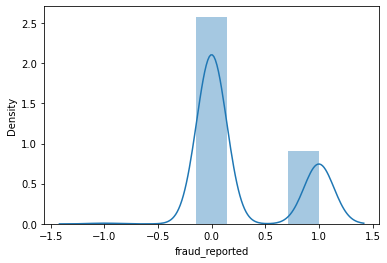

In [158]:
sns.distplot(y_test-y_pred)
plt.show()